In [1]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
#from pahelix.utils.compound_tools import *
#from pahelix.datasets.inmemory_dataset import InMemoryDataset
from rdkit import rdBase
import numpy as np
rdBase.rdkitVersion
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
import pandas as pd
import pickle
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import py3Dmol


In [3]:
smi="CSCCC(C(=O)NCC(=O)NC(CC1=CNC2=CC=CC=C21)C(=O)NC(CCSC)C(=O)NC(CC(=O)O)C(=O)NC(CC3=CC=CC=C3)C(=O)N)NC(=O)C(CC4=CC=C(C=C4)OS(=O)(=O)O)NC(=O)C(CC(=O)O)N"
m = Chem.MolFromSmiles(smi)
m=Chem.AddHs(m)
AllChem.EmbedMolecule(m)
IPythonConsole.drawMol3D(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:
smi="CSCCC(C(=O)NCC(=O)NC(CC1=CNC2=CC=CC=C21)C(=O)NC(CCSC)C(=O)NC(CC(=O)O)C(=O)NC(CC3=CC=CC=C3)C(=O)N)NC(=O)C(CC4=CC=C(C=C4)OS(=O)(=O)O)NC(=O)C(CC(=O)O)N"
m = Chem.MolFromSmiles(smi)
AllChem.Compute2DCoords(m)
conf = m.GetConformer()
IPythonConsole.drawMol3D(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

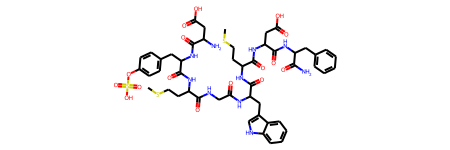

In [3]:
m

In [5]:
m.GetConformer().GetPositions()

array([[-10.16324028,  -1.98730816,   0.        ],
       [ -8.93348278,  -2.84620074,   0.        ],
       [ -7.57478122,  -2.2106458 ,   0.        ],
       [ -6.34502372,  -3.06953838,   0.        ],
       [ -4.98632217,  -2.43398343,   0.        ],
       [ -3.75656466,  -3.29287602,   0.        ],
       [ -3.8855087 ,  -4.78732355,   0.        ],
       [ -2.39786311,  -2.65732107,   0.        ],
       [ -1.1681056 ,  -3.51621366,   0.        ],
       [  0.19059595,  -2.88065871,   0.        ],
       [  0.31954   ,  -1.38621117,   0.        ],
       [  1.42035346,  -3.73955129,   0.        ],
       [  2.77905501,  -3.10399635,   0.        ],
       [  4.00881252,  -3.96288893,   0.        ],
       [  3.87986847,  -5.45733647,   0.        ],
       [  2.59504361,  -6.23143276,   0.        ],
       [  2.93422022,  -7.69258273,   0.        ],
       [  4.42866776,  -7.82152678,   0.        ],
       [  5.33282424,  -9.01839814,   0.        ],
       [  6.82142349,  -8.83381

In [2]:
def calc_rmse(labels, preds):
    """tbd"""
    return np.sqrt(np.mean((preds - labels) ** 2))


def calc_mae(labels, preds):
    """tbd"""
    return np.mean(np.abs(preds - labels))

In [4]:
def seperate(filename):
    with open(f"./log/{filename}.pickle","rb") as f:
        dic=pickle.load(f)
    preds=np.array(dic["pred"])
    labels=np.array(dic["label"])
    if filename=="qm7":
        mean=calc_mae(labels, preds)
        std=np.std((preds - labels))

    else:
        mean=calc_rmse(labels, preds)
        std=np.sqrt(np.std((preds - labels) ** 2))
    
    pd_dic={"smiles":[],"pred":[],"label":[],"diff":[],"mean":[],"std":[]}
    for i in range(len(dic["smiles"])):
        if abs(dic["pred"][i]-dic["label"][i])<mean-0.5*std:
            pd_dic["smiles"].append(dic["smiles"][i])
            pd_dic["label"].append(dic["label"][i])
            pd_dic["pred"].append(dic["pred"][i])
            pd_dic["diff"].append(dic["label"][i]-dic["pred"][i])
            pd_dic["mean"].append(mean)
            pd_dic["std"].append(std)

    df = pd.DataFrame.from_dict(pd_dic)
    df.to_csv("./log/highConfidence-"+filename+"-mean="+str(mean)+"-std="+str(std)+".csv",index=False)



In [24]:
def featurize(filename):
    desc_list=[n[0] for n in Descriptors._descList]
    with open(f"./log/{filename}.pickle","rb") as f:
        dic=pickle.load(f)
    feat_dic={"smi":[],"pred":[],"label":[],"diff":[]}
    for desc in desc_list:
        feat_dic[desc]=[]
    for i in range(len(dic["smiles"])):
        smi=dic["smiles"][i]
        mol=Chem.MolFromSmiles(smi)
        calc=MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
        descriptions=calc.CalcDescriptors(mol)
        feat_dic["smi"].append(smi)
        feat_dic["pred"].append(dic["pred"][i])
        feat_dic["label"].append(dic["label"][i])
        feat_dic["diff"].append(dic["label"][i]-dic["pred"][i])
        for i in range(len(desc_list)):
            feat_dic[desc_list[i]].append(descriptions[i])
    df = pd.DataFrame.from_dict(feat_dic)
    df.to_csv("./log/features-"+filename+".csv",index=False)



In [26]:
for dataset in ["esol","freesolv","lipophilicity","qm7"]:
    featurize(dataset)

In [30]:
mol=esol_pickle[sample_smiles][0]

In [21]:
type(atom_poses)

list

In [31]:
if len(mol.GetAtoms()) <= 400:
    mol, atom_poses = Compound3DKit.get_MMFF_atom_poses(mol, numConfs=10)
else:
    atom_poses = Compound3DKit.get_2d_atom_poses(mol)
atom_poses = Compound3DKit.get_atom_poses(mol, mol.GetConformer())
data_dic_geo=mol_to_geognn_graph_data(mol, atom_poses, dir_type='HT')

In [ ]:
dataset = InMemoryDataset(data_list)

In [34]:
data_dic_geo["smiles"]

KeyError: 'smiles'

In [36]:
data_dic_geo.keys()

dict_keys(['atomic_num', 'chiral_tag', 'degree', 'explicit_valence', 'formal_charge', 'hybridization', 'implicit_valence', 'is_aromatic', 'total_numHs', 'mass', 'bond_dir', 'bond_type', 'is_in_ring', 'edges', 'morgan_fp', 'maccs_fp', 'daylight_fg_counts', 'atom_pos', 'bond_length', 'BondAngleGraph_edges', 'bond_angle'])

In [45]:
for key in data_dic.keys():
    if key not in new_dataset[0].keys():
        print(key)

atomic_num.seq_len
atomic_num.singular
chiral_tag.seq_len
chiral_tag.singular
degree.seq_len
degree.singular
explicit_valence.seq_len
explicit_valence.singular
formal_charge.seq_len
formal_charge.singular
hybridization.seq_len
hybridization.singular
implicit_valence.seq_len
implicit_valence.singular
is_aromatic.seq_len
is_aromatic.singular
total_numHs.seq_len
total_numHs.singular
mass.seq_len
mass.singular
bond_dir.seq_len
bond_dir.singular
bond_type.seq_len
bond_type.singular
is_in_ring.seq_len
is_in_ring.singular
edges.seq_len
edges.singular
morgan_fp.seq_len
morgan_fp.singular
maccs_fp.seq_len
maccs_fp.singular
daylight_fg_counts.seq_len
daylight_fg_counts.singular
atom_pos.seq_len
atom_pos.singular
bond_length.seq_len
bond_length.singular
BondAngleGraph_edges.seq_len
BondAngleGraph_edges.singular
bond_angle.seq_len
bond_angle.singular
label
label.seq_len
label.singular
smiles
smiles.seq_len
smiles.singular


In [ ]:
dataset = InMemoryDataset(data_list)

In [3]:
f=open("cached_data/bbbp/bbbp.pkl","rb")
esol_pickle=pickle.load(f)

In [5]:
bbbp_geo_smiles=list(esol_pickle.keys())

In [11]:
import pandas as pd
bbbp_smiles=pd.read_csv("chemrl_downstream_datasets/bbbp/raw/BBBP.csv")["smiles"]

In [13]:
count=0
for smiles in bbbp_smiles:
    if smiles in bbbp_geo_smiles:
        count+=1
count

1928

In [ ]:
esol_pickle

In [7]:
sample_smiles="OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O "

In [53]:
data_dic["atom_pos"].shape

(14991, 3)

In [37]:
data=np.load("cached_data/esol/part-000000.npz")
data_dic=dict(data)
len(data_dic["smiles"])
for smiles in data_dic["smiles"]:
    mol=esol_pickle[smiles][0]
    atom_poses = Compound3DKit.get_atom_poses(mol, mol.GetConformer())
    new_mol_dic=mol_to_geognn_graph_data(mol, atom_poses, dir_type='HT')
    new_dataset.append(new_mol_dic)
    
    

In [40]:
new_dataset = InMemoryDataset(new_dataset)

In [43]:
new_dataset[0].keys()

dict_keys(['atomic_num', 'chiral_tag', 'degree', 'explicit_valence', 'formal_charge', 'hybridization', 'implicit_valence', 'is_aromatic', 'total_numHs', 'mass', 'bond_dir', 'bond_type', 'is_in_ring', 'edges', 'morgan_fp', 'maccs_fp', 'daylight_fg_counts', 'atom_pos', 'bond_length', 'BondAngleGraph_edges', 'bond_angle'])

In [28]:
data=np.load("cached_data/esol/part-000000.npz")

In [29]:
data_dic=dict(data)
len(data_dic["smiles"])

1128

In [21]:
data_dic.keys()

dict_keys(['atomic_num', 'atomic_num.seq_len', 'atomic_num.singular', 'chiral_tag', 'chiral_tag.seq_len', 'chiral_tag.singular', 'degree', 'degree.seq_len', 'degree.singular', 'explicit_valence', 'explicit_valence.seq_len', 'explicit_valence.singular', 'formal_charge', 'formal_charge.seq_len', 'formal_charge.singular', 'hybridization', 'hybridization.seq_len', 'hybridization.singular', 'implicit_valence', 'implicit_valence.seq_len', 'implicit_valence.singular', 'is_aromatic', 'is_aromatic.seq_len', 'is_aromatic.singular', 'total_numHs', 'total_numHs.seq_len', 'total_numHs.singular', 'mass', 'mass.seq_len', 'mass.singular', 'bond_dir', 'bond_dir.seq_len', 'bond_dir.singular', 'bond_type', 'bond_type.seq_len', 'bond_type.singular', 'is_in_ring', 'is_in_ring.seq_len', 'is_in_ring.singular', 'edges', 'edges.seq_len', 'edges.singular', 'morgan_fp', 'morgan_fp.seq_len', 'morgan_fp.singular', 'maccs_fp', 'maccs_fp.seq_len', 'maccs_fp.singular', 'daylight_fg_counts', 'daylight_fg_counts.seq_le